# Equilibrium Potential and Carrier Distribution

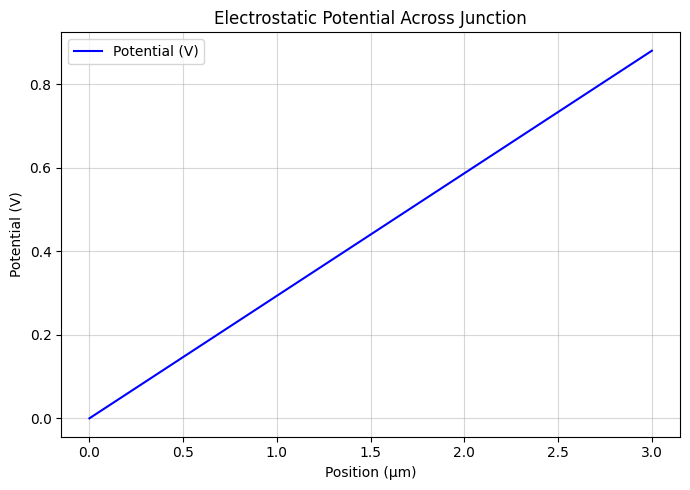

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Constants and doping parameters ---
q = 1.6e-19            # electron charge (C)
kT = 0.026             # thermal voltage at 300K (V)
ni = 1e10              # intrinsic carrier density (cm^-3)
Na = 1e16              # acceptor concentration (p-side, cm^-3)
Nd = 5e18              # donor concentration (n-side, cm^-3)

# dielectric permittivity of silicon
eps_si = 11.7 * 8.85e-14   # F/cm

# --- Device grid ---
L = 3e-4        # device thickness = 300 μm
Npoints = 400
x = np.linspace(0, L, Npoints)

# --- Built-in potential (approximation) ---
Vbi = kT * np.log(Na * Nd / ni**2)

# Approximate potential profile across depletion
phi = np.linspace(0, Vbi, Npoints)

# Carrier concentrations
n = ni * np.exp(phi / kT)
p = ni * np.exp(-phi / kT)

# --- Plot ---
plt.figure(figsize=(7,5))
plt.plot(x*1e4, phi, 'b', label="Potential (V)")
plt.xlabel("Position (μm)")
plt.ylabel("Potential (V)")
plt.title("Electrostatic Potential Across Junction")
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.savefig("fig_potential.png", dpi=300)
plt.show()


# Dark J–V Characteristics

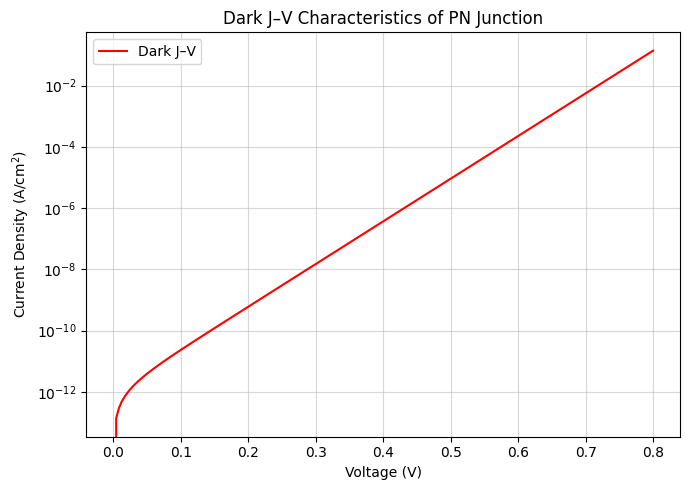

In [5]:

V = np.linspace(0, 0.8, 200)   # applied voltage (0–0.8 V)
J0 = 1e-12                     # reverse saturation current (A/cm^2)
ideality = 1.2                 # diode ideality factor

J_dark = J0 * (np.exp(V / (ideality * kT)) - 1)


plt.figure(figsize=(7,5))
plt.semilogy(V, J_dark, 'r', label="Dark J–V")
plt.xlabel("Voltage (V)")
plt.ylabel("Current Density (A/cm$^2$)")
plt.title("Dark J–V Characteristics of PN Junction")
plt.legend()
plt.grid(True, which="both", alpha=0.5)
plt.tight_layout()
plt.savefig("fig_jv_dark.png", dpi=300)
plt.show()


# Optical Generation and Collection Probability

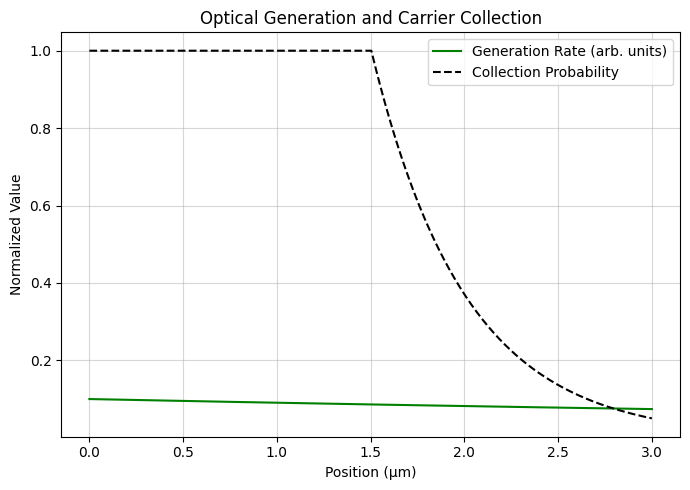

In [3]:

alpha = 1e3
phi_incident = 1e17

G = phi_incident * alpha * np.exp(-alpha * x)


C = np.ones_like(x)
C[int(Npoints/2):] = np.exp(-(x[int(Npoints/2):] - x[int(Npoints/2)]) / (5e-5))

plt.figure(figsize=(7,5))
plt.plot(x*1e4, G/1e21, 'g', label="Generation Rate (arb. units)")
plt.plot(x*1e4, C, 'k--', label="Collection Probability")

plt.xlabel("Position (μm)")
plt.ylabel("Normalized Value")
plt.title("Optical Generation and Carrier Collection")
plt.legend()

plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.savefig("fig_generation.png", dpi=300)

plt.show()


# Illuminated J–V Curve

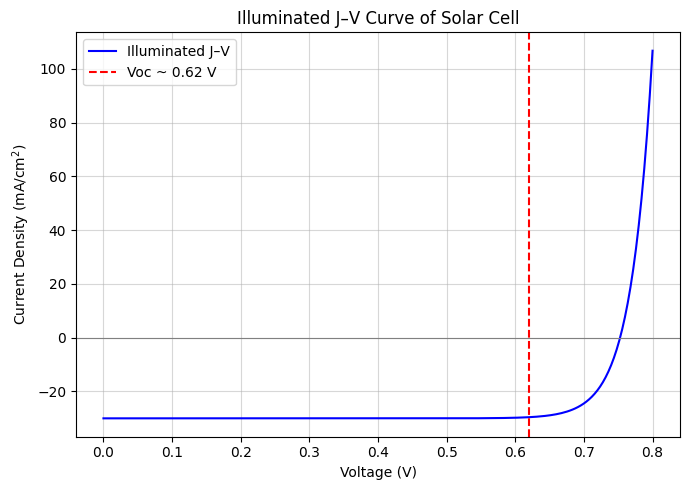

In [4]:
# --- Illuminated J-V = dark current - photocurrent ---
Jsc = 30e-3   # short-circuit current density (30 mA/cm^2)
J_light = J_dark - Jsc

# --- Plot ---
plt.figure(figsize=(7,5))
plt.plot(V, J_light*1e3, 'b', label="Illuminated J–V")  # in mA/cm^2
plt.axhline(0, color="gray", lw=0.8)
plt.axvline(0.62, color="red", ls="--", label="Voc ~ 0.62 V")
plt.xlabel("Voltage (V)")
plt.ylabel("Current Density (mA/cm$^2$)")
plt.title("Illuminated J–V Curve of Solar Cell")
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.savefig("fig_jv_light.png", dpi=300)
plt.show()
